In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
from sklearn.preprocessing import MinMaxScaler


In [10]:
import numpy as np
from copy import deepcopy
from scipy.linalg import norm
from scipy.spatial.distance import cdist

class Fuzzy_Clustering:
    def __init__(self, n_clusters=2, max_iter=150, fuzzines=2, error=1e-5, random_state=42, dist="euclidean", method="Cmeans"):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.fuzzines = fuzzines
        self.error = error
        self.random_state = random_state
        self.dist = dist
        self.method = method
        
    def fit(self, X):
        memberships = self._init_mem(X)
              
        iteration = 0
        while iteration < self.max_iter:
            membershipsNew = deepcopy(memberships)
            new_class_centers = self._update_centers(X, memberships)
            distance = self._calculate_dist(X,memberships,new_class_centers)
            memberships = self._update_memberships(X, memberships, new_class_centers, distance)
            iteration += 1
            if norm(memberships - membershipsNew) < self.error:
                break
            
        return memberships, new_class_centers
    
    def _init_mem(self,X):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters

        #initialize memberships
        rnd = np.random.RandomState(self.random_state)
        memberships = rnd.rand(n_samples,n_clusters)

        #update membership relative to classes
        summation = memberships.sum(axis=1).reshape(-1,1)
        denominator = np.repeat(summation,n_clusters,axis=1)
        memberships = memberships/denominator
        
        return memberships

    def _update_centers(self, X, memberships):
        fuzzyMem = memberships ** self.fuzzines
        new_class_centers = (np.dot(X.T,fuzzyMem)/np.sum(fuzzyMem,axis=0)).T
        return new_class_centers
    
    def _calculate_fuzzyCov(self,X,memberships,new_class_centers):
        #calculating covariance matrix in its fuzzy form  
        fuzzyMem = memberships ** self.fuzzines
        n_clusters = self.n_clusters
        FcovInv_Class = []
        dim = X.shape[1]
        for i in range(n_clusters): 
            diff = X-new_class_centers[i]
            left = np.dot((fuzzyMem[:,i].reshape(-1,1)*diff).T,diff)/np.sum(fuzzyMem[:,i],axis=0)
            Fcov = (np.linalg.det(left)**(-1/dim))*left
            print("::::::",Fcov)
            FcovInv = np.linalg.inv(Fcov)
            FcovInv_Class.append(FcovInv)
        return FcovInv_Class

    def _calculate_dist(self,X,memberships,new_class_centers):
        print("::::::::::::::::::::::::::::::::::::::::::::")
        if self.method == "Gustafson–Kessel":
            n_clusters = self.n_clusters
            FcovInv_Class = self._calculate_fuzzyCov(X,memberships,new_class_centers)

            #calculating mahalanobis distance
            mahalanobis_Class = []
            for i in range(n_clusters): 
                diff = X-new_class_centers[i]
                left = np.dot(diff,FcovInv_Class[i])    
                mahalanobis = np.diag(np.dot(left,diff.T))
                mahalanobis_Class.append(mahalanobis)
            distance = np.array(mahalanobis_Class).T
            print("::::::::::::::::::::::::::::::::::::::::::::")
            return distance
        
        elif self.method == "Cmeans":
            distance = cdist(X, new_class_centers,metric=self.dist)
            return distance

    def _update_memberships(self, X, memberships, new_class_centers, distance):
        fuzziness = self.fuzzines
        n_clusters = self.n_clusters
        n_samples = X.shape[0]
        
        power = float(2/(fuzziness - 1))
        distance = distance**power
        arr = np.zeros((n_samples,n_clusters))
        for i in range(n_clusters):
            for ii in range(n_clusters):
                arr[:,ii] = ((distance[:,i]/distance[:,ii]))
            memberships[:,i] = 1/np.sum(arr,axis=1)   
        return memberships
print("::::"*60)
    
        

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


In [11]:
full_data_=pd.read_csv("resturants_all_features_with_fuzzy_clusters.csv")
full_data_

,restaurant_id_x,low_price,mid_price,high_price,resturant_id,low_famous,mid_famous,high_famous,adress,id,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,2058,0.000000,0.279590,0.464437,2058,0.0,0.071826,0.878528,مزة,2058,...,0.030406,0.205170,0.205170,0.205170,0.205170,0.021984,0.030467,0.035508,0.030511,0.030443
1,2060,0.000000,0.971911,0.000000,2060,0.0,0.000000,0.837557,الشعلان,2060,...,0.018812,0.222064,0.222064,0.222064,0.222064,0.013882,0.018854,0.022472,0.018884,0.018838
2,2070,0.000000,0.284689,0.454670,2070,0.0,0.807947,0.000000,مزة,2070,...,0.193517,0.020190,0.020190,0.020190,0.020190,0.022074,0.192414,0.126779,0.191618,0.192839
3,2074,0.000000,0.000000,0.731988,2074,0.0,0.561306,0.050716,القصاع,2074,...,0.164901,0.035475,0.035475,0.035475,0.035475,0.035599,0.165055,0.162386,0.165164,0.164996
4,2075,0.000000,0.789651,0.000000,2075,0.0,0.440871,0.254397,مزة,2075,...,0.150563,0.048005,0.048005,0.048005,0.048005,0.031956,0.150927,0.172555,0.151191,0.150787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2002,0.797407,0.000000,0.000000,2002,0.0,0.865894,0.000000,صالحية,2002,...,0.177653,0.030508,0.030508,0.030508,0.030508,0.033268,0.177115,0.135886,0.176724,0.177323
158,2033,0.000000,0.757134,0.000000,2033,0.0,0.870861,0.000000,ركن الدين,2033,...,0.167206,0.038029,0.038029,0.038029,0.038029,0.041056,0.166886,0.139071,0.166653,0.167010
159,2034,0.000000,0.748155,0.000000,2034,0.0,0.908585,0.000000,ركن الدين,2034,...,0.184041,0.027082,0.027082,0.027082,0.027082,0.029263,0.183176,0.129130,0.182551,0.183509
160,2036,0.000000,0.307376,0.411212,2036,0.0,0.000000,0.891542,كفرسوسة,2036,...,0.036874,0.195159,0.195159,0.195159,0.195159,0.028654,0.036946,0.042972,0.036998,0.036918


In [12]:
full_data=full_data_.drop(columns=['restaurant_id_x','id','resturant_id'])

In [13]:
my_data=full_data[['menu']]
locations=full_data_[['latitude','longitude']]

In [14]:
my_data['menu']=my_data['menu'].apply(eval)

C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
features=[]
for val in my_data.values:
    features.append(val[0]+list(val[1:]))

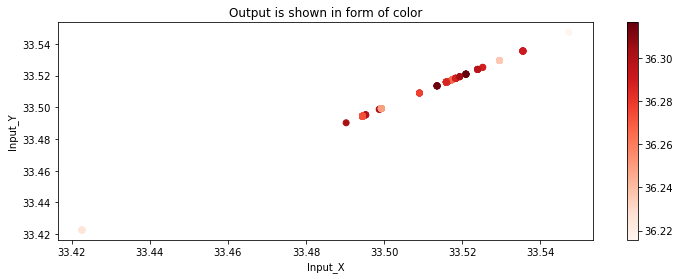

In [16]:
train = locations.values
plt.figure(figsize=(12,4))
plt.scatter(train[:,0],train[:,0], c=train[:,1],cmap="Reds") 
#redness will show the intensity of output/grade value at input location
plt.xlabel("Input_X")
plt.ylabel("Input_Y")
plt.title("Output is shown in form of color")
plt.colorbar()

::::::::::::::::::::::::::::::::::::::::::::
:::::: [[0.96391781 0.49602686]
 [0.49602686 1.29268557]]
:::::: [[0.94002913 0.37905198]
 [0.37905198 1.21664357]]
:::::: [[0.80898639 0.48710322]
 [0.48710322 1.52940713]]
::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::
:::::: [[1.1558259  0.60181262]
 [0.60181262 1.17853254]]
:::::: [[1.02070232 0.31064905]
 [0.31064905 1.07426309]]
:::::: [[0.73831709 0.45223782]
 [0.45223782 1.63143865]]
::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::
:::::: [[1.72660825 0.88017388]
 [0.88017388 1.02785682]]
:::::: [[1.16735191 0.10473671]
 [0.10473671 0.86603685]]
:::::: [[0.53525055 0.07369134]
 [0.07369134 1.8784295 ]]
::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::
:::::: [[4.57299865 2.89021904]
 [2.89021904 2.04534635]]
:::::: [[ 1.72395046 -0.31694103]
 [-0.31694103  0.63833135]]
:::::: [[ 0.52816677 -0.10312344]
 [-0.1031

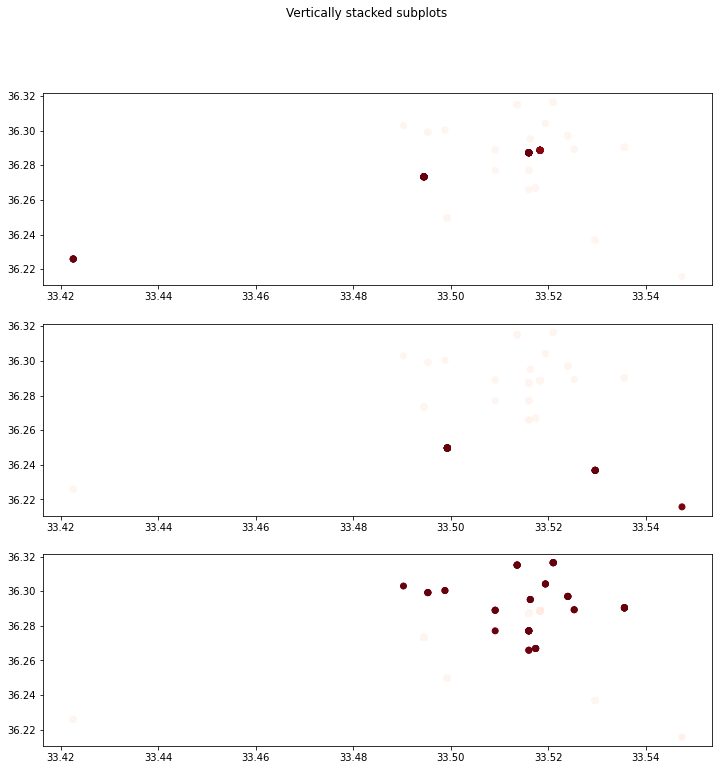

In [17]:
Fclustering = Fuzzy_Clustering(method="Gustafson–Kessel",n_clusters = 3)
memberships, classCenters = Fclustering.fit(train)
fig, axs = plt.subplots(3,figsize=(12,12))
fig.suptitle('Vertically stacked subplots')
axs[0].scatter(train[:,0], train[:,1], c=memberships[:,0],cmap="Reds")
axs[1].scatter(train[:,0], train[:,1], c=memberships[:,1],cmap="Reds")
axs[2].scatter(train[:,0], train[:,1], c=memberships[:,2],cmap="Reds")